In [10]:
import os
import numpy as np
import pandas as pd

from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def tabulate_events(dpath):
    summary_iterators = [EventAccumulator(os.path.join(dpath, dname)).Reload() for dname in os.listdir(dpath)]
    idx=0
    for i in range(len(summary_iterators)):
        if len(summary_iterators[i].Tags()['scalars'])>0:
            idx=i
    
    tags = summary_iterators[idx].Tags()['scalars']
    print(tags)
#     for it in summary_iterators:
#         assert it.Tags()['scalars'] == tags

    out = defaultdict(list)
    steps = []

    for tag in tags:
        
        
        steps.append([e.step for e in summary_iterators[idx].Scalars(tag)])

#         for events in zip(*[acc.Scalars(tag) for acc in summary_iterators]):
#             assert len(set(e.step for e in events)) == 1

        out[tag].append([e.value for e in summary_iterators[idx].Scalars(tag)])
        out[tag]=np.squeeze(out[tag])

    
    return out, steps


def to_csv(dpath):
    dirs = os.listdir(dpath)

    d, steps = tabulate_events(dpath)
    tags, values= list(d.keys()), list(d.values())
    np_values = np.array(values)
    for index, tag in enumerate(tags):
        df = pd.DataFrame(np_values[index], index=steps[index], columns=[tag])
        df.to_csv(get_file_path(dpath, tag))


def get_file_path(dpath, tag):
    file_name = tag.replace("/", "_") + '.csv'
    folder_path = os.path.join(dpath, 'csv')
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return os.path.join(folder_path, file_name)


path = "ma/runs/maddpg/1002_2142simple_spread_seed9999"
to_csv(path)


# 0924_1408simple_tag_seed777
# 0924_1537simple_tag_seed11
# 0924_1750simple_tag_seed93

['agent/total_reward', 'agent/actor_loss', 'agent/critic_loss']


/var/folders/gy/qb354j6n7mzfs_x8y_6mb0t80000gn/T/ipykernel_60079/926612085.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_values = np.array(values)


In [178]:
with open("swag/log_spread_bootmaddpg.txt", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(" ")) for l in temp_f.readlines() ]
### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count)+1)]

df_777 = pd.read_csv("swag/log_spread_maddpg_1e-4.txt", header=None, sep='\s+', names=column_names)
df_777[3] = df_777[3].astype(str).str.replace('[Episode]', '')
df_777[3] = df_777[3].astype(str).str.replace('[', '')

df_777 = df_777[500:9500]
df_777[3] = df_777[3].astype(float)
df_777[1] = df_777[1].astype(float)
df_777[6] = df_777[6].astype(float)
df_777.insert(0, "idx", range(0,len(df_777)), allow_duplicates=True)



df_11 = pd.read_csv("swag/log_spread_maddpg_1e-4_11.txt", header=None, sep='\s+', names=column_names)
df_11[3] = df_11[3].astype(str).str.replace('[Episode]', '')
df_11[3] = df_11[3].astype(str).str.replace('[', '')

df_11 = df_11[500:9500]
df_11[3] = df_11[3].astype(float)
df_11[1] = df_11[1].astype(float)
df_11[6] = df_11[6].astype(float)
df_11.insert(0, "idx", range(0,len(df_11)), allow_duplicates=True)


df_123 = pd.read_csv("swag/log_spread_maddpg_1e-4_123.txt", header=None, sep='\s+', names=column_names)
df_123[3] = df_123[3].astype(str).str.replace('[Episode]', '')
df_123[3] = df_123[3].astype(str).str.replace('[', '')

df_123 = df_123[500:9500]
df_123[3] = df_123[3].astype(float)
df_123[1] = df_123[1].astype(float)
df_123[6] = df_123[6].astype(float)
df_123.insert(0, "idx", range(0,len(df_123)), allow_duplicates=True)

C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
C:\Users\alber\Anaconda3\lib\site-packages\ipykern

In [179]:
df_11

,idx,0,1,2,3,4,5,6,7,8,9,10,11,12
500,0,a_loss,0.7589,c_loss,0.0060,00499],reward,-44359.0424,adv_reward,0.0,agent_reward,-44359.0424,NaN,NaN
501,1,a_loss,0.6892,c_loss,0.0053,00500],reward,-44218.9420,adv_reward,0.0,agent_reward,-44218.9420,NaN,NaN
502,2,a_loss,0.8143,c_loss,0.0051,00501],reward,-39568.2502,adv_reward,0.0,agent_reward,-39568.2502,NaN,NaN
503,3,a_loss,0.6915,c_loss,0.0056,00502],reward,-45922.3689,adv_reward,0.0,agent_reward,-45922.3689,NaN,NaN
504,4,a_loss,0.7884,c_loss,0.0074,00503],reward,-41029.6322,adv_reward,0.0,agent_reward,-41029.6322,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,8995,a_loss,0.5257,c_loss,0.0011,09494],reward,-2412.1367,adv_reward,0.0,agent_reward,-2412.1367,NaN,NaN
9496,8996,a_loss,0.5327,c_loss,0.0088,09495],reward,-3025.1424,adv_reward,0.0,agent_reward,-3025.1424,NaN,NaN
9497,8997,a_loss,0.4755,c_loss,0.0047,09496],reward,-2041.7363,adv_reward,0.0,agent_reward,-2041.7363,NaN,NaN
9498,8998,a_loss,0.4629,c_loss,0.0071,09497],reward,-2895.7144,adv_reward,0.0,agent_reward,-2895.7144,NaN,NaN


0.3940687666666666


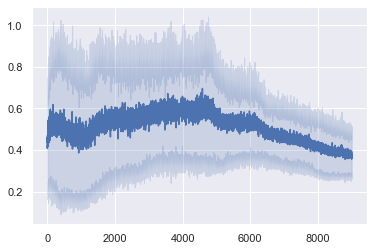

In [182]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
df1 = pd.Series(df_11[1].astype(float))
df2 = pd.Series(df_123[1].astype(float))
df3 = pd.Series(df_777[1].astype(float))

mean_out = np.mean([df1,df2, df3], axis = 0)
std_out = np.std([df1, df2, df3], axis=0)

plt.plot(range(len(df1)), mean_out, 'b-', label='mean_1')
plt.fill_between(range(len(df1)), mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
print(np.mean(mean_out[-1000:]))

0.003102833333333333


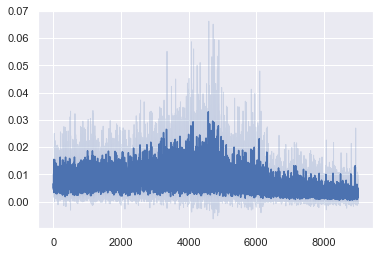

In [183]:
sns.set()
df1 = pd.Series(df_11[3].astype(float))
df2 = pd.Series(df_123[3].astype(float))
df3 = pd.Series(df_777[3].astype(float))

mean_out = np.mean([df1,df2, df3], axis = 0)
std_out = np.std([df1, df2, df3], axis=0)

plt.plot(range(len(df1)), mean_out, 'b-', label='mean_1')
plt.fill_between(range(len(df1)), mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
print(np.mean(mean_out[-1000:]))

In [75]:
sns.set()
df1 = pd.Series(df_11[6].astype(float))
df2 = pd.Series(df_123[6].astype(float))
df3 = pd.Series(df_777[6].astype(float))

mean_out = np.mean([df1,df2, df3], axis = 0)
std_out = np.std([df1, df2, df3], axis=0)

plt.plot(range(len(df1)), mean_out, 'b-', label='mean_1')
plt.fill_between(range(len(df1)), mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
print(np.mean(mean_out[-1000:]))

NameError: name 'df_11' is not defined

6.693322836023346e-05


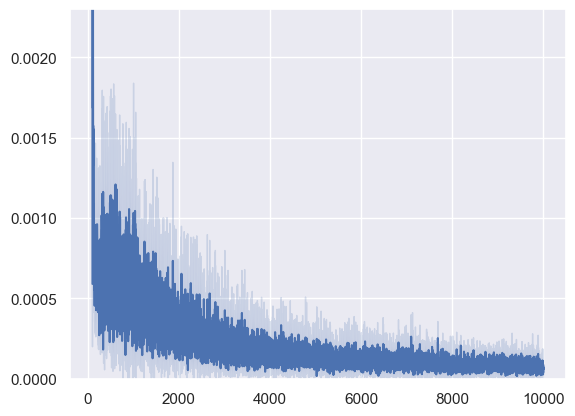

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = pd.read_csv('bootmaddpg/0924_0055simple_tag_seed777/csv/agent_critic_loss.csv')
df2= pd.read_csv('bootmaddpg/0924_1613simple_tag_seed11/csv/agent_critic_loss.csv')
df3= pd.read_csv('bootmaddpg/0924_1851simple_tag_seed93/csv/agent_critic_loss.csv')


df1= pd.Series(df1['agent/loss'].astype(float))
df2= pd.Series(df2['agent/loss'].astype(float))
df3=pd.Series(df3['agent/critic_loss'].astype(float))

sns.set()

mean_out = np.mean([df1,df2, df3], axis = 0)
std_out = np.std([df1, df2, df3], axis=0)
step=[s +101 for s in list(range(len(df1)))]

plt.plot(step, mean_out, 'b-', label='mean_1')
plt.fill_between(step, mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
plt.ylim(0,0.0023)
print(np.mean(mean_out[-10:]))
# selector = df[df['col'] != 1].index
# df = pd.read_csv('path', skiprows=selector)

7.648581443693376e-05


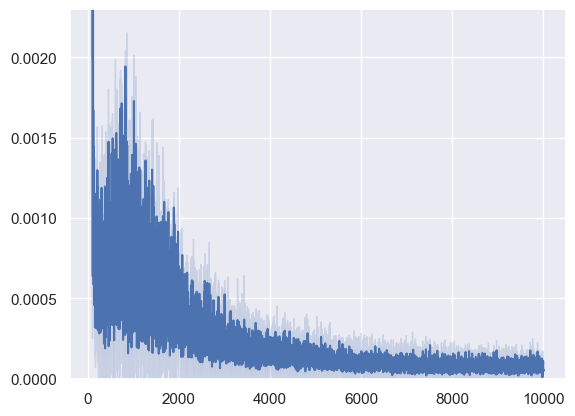

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 0924_1408simple_tag_seed777
# 0924_1537simple_tag_seed11
# 0924_1750simple_tag_seed93

df1 = pd.read_csv('maddpg/0924_1408simple_tag_seed777/csv/agent_critic_loss.csv')
df2= pd.read_csv('maddpg/0924_1537simple_tag_seed11/csv/agent_critic_loss.csv')
df3= pd.read_csv('maddpg/0924_1750simple_tag_seed93/csv/agent_critic_loss.csv')

df1= pd.Series(df1['agent/loss'].astype(float))
df2= pd.Series(df2['agent/loss'].astype(float))
df3=pd.Series(df3['agent/critic_loss'].astype(float))

sns.set()

mean_out = np.mean([df1,df2, df3], axis = 0)
step=[s +101 for s in list(range(len(df1)))]

plt.plot(step, mean_out, 'b-', label='mean_1')
plt.fill_between(step, mean_out - std_out, mean_out + std_out, color='b', alpha=0.2)
plt.ylim(0,0.0023)
print(np.mean(mean_out[-10:]))